In [20]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
images = digits.images
targets = digits.target

### Isolation

In [4]:
x = images.reshape(-1, 64)
y = targets

In [5]:
def show_example(index):
    print(targets[index])
    plt.imshow(images[index], cmap='binary')
    plt.show()
    print()

0

1

2

3

4



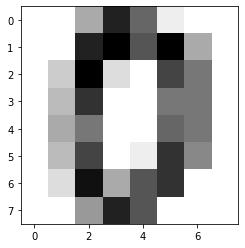

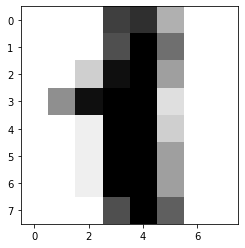

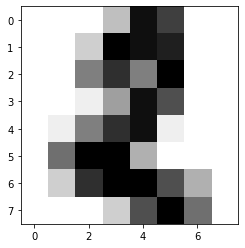

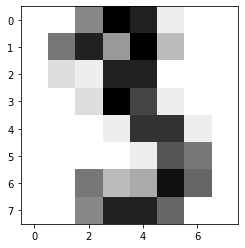

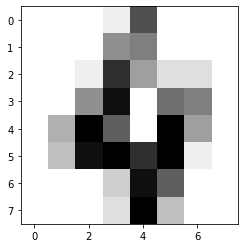

In [6]:
for i in range(0,5):
    show_example(i)

## Split

In [7]:
x_tr, x_te, y_tr, y_te = tts(x, y,
                             stratify=y,
                             random_state=777,
                             train_size=0.8)
for each in [x_tr, x_te, y_tr, y_te]:
    print(each.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


### Pipeline

In [8]:
pipeline_details = [('pca', PCA()),
                    ('knn', KNN())]

pipeline = Pipeline(pipeline_details)

### Hyperparamètres (pour la GridSearch)

In [9]:
hp_parameters = {'pca__n_components': list(range(1, 64+1, 3)),
                'knn__n_neighbors': [1, 3, 5, 9, 21]}

### GridSearch

In [10]:
hp_search = GridSearchCV(pipeline,
                         hp_parameters,
                         scoring='accuracy',
                         cv=5)
hp_search.fit(x_tr, y_tr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 9, 21],
                         'pca__n_components': [1, 4, 7, 10, 13, 16, 19, 22, 25,
                                               28, 31, 34, 37, 40, 43, 46, 49,
                                               52, 55, 58, 61, 64]},
             scoring='accuracy')

In [11]:
hp_search.best_score_

0.985387630662021

In [12]:
hp_search.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 43}

In [14]:
def get_accuracy(preds, target):
    m = target.shape[0] # nombre d'exemples
    total_correct = (preds == target).sum()
    accuracy = total_correct / m
    return str(round(accuracy * 100, 2)) + "%"

In [15]:
pca = PCA(n_components=43)
knn = KNN(n_neighbors=3)

pca.fit(x_tr)
x_tr_PCA = pca.transform(x_tr)
x_te_PCA = pca.transform(x_te)

knn.fit(x_tr_PCA, y_tr)
preds = knn.predict(x_te_PCA)

get_accuracy(preds, y_te)

'99.44%'

## Confusion matrix

In [16]:
train_preds = knn.predict(x_tr_PCA)
from sklearn.metrics import confusion_matrix

labels = range(10)
cm_train = confusion_matrix(train_preds, y_tr, labels)
cm_test = confusion_matrix(preds, y_te, labels)
cm_train, cm_test

/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=range(0, 10) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(array([[142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0, 146,   0,   0,   0,   0,   0,   0,   2,   1],
        [  0,   0, 142,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 145,   0,   0,   0,   0,   0,   2],
        [  0,   0,   0,   0, 145,   0,   0,   0,   0,   1],
        [  0,   0,   0,   0,   0, 143,   0,   0,   0,   1],
        [  0,   0,   0,   0,   0,   1, 145,   0,   0,   0],
        [  0,   0,   0,   1,   0,   0,   0, 142,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 137,   1],
        [  0,   0,   0,   0,   0,   1,   0,   1,   0, 138]]),
 array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0]

In [22]:
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(cm, annot=True)
    plt.show()

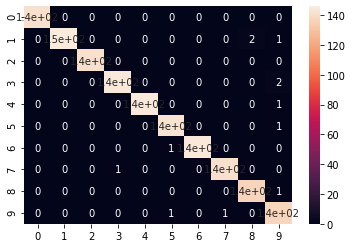

In [23]:
show_cm(cm_train, labels)

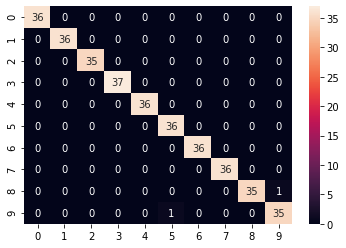

In [24]:
show_cm(cm_test, labels)